In [480]:
import pandas as pd

In [482]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('/Users/aishakothare/Desktop/DMT/ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/Users/aishakothare/Desktop/DMT/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('/Users/aishakothare/Desktop/DMT/ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python',encoding='latin-1')



In [483]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [484]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [485]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [486]:
genres = movies.genres.str.split('|', expand=True).stack()
genre_num = genres.index.get_level_values(0)
movies_genres = movies.loc[genre_num].copy()
movies_genres["genres"] = genres.values
split_data = pd.merge(pd.merge(ratings, users), movies_split_genres)
split_data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
2101810,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
2101811,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy
2101812,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Drama
2101813,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Western


In [487]:
split_data["year"] = split_data["title"].str[-5:-1]
split_data["year"] = pd.to_numeric(split_data["year"])
split_data["title"] = split_data["title"].str[:-7]
split_data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest,Drama,1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest,Drama,1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest,Drama,1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest,Drama,1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest,Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...
2101810,5780,2845,1,958153068,M,18,17,92886,White Boys,Drama,1999
2101811,5851,3607,5,957756608,F,18,20,55410,One Little Indian,Comedy,1973
2101812,5851,3607,5,957756608,F,18,20,55410,One Little Indian,Drama,1973
2101813,5851,3607,5,957756608,F,18,20,55410,One Little Indian,Western,1973


In [488]:
split_data.isnull().sum()

user_id       0
movie_id      0
rating        0
timestamp     0
gender        0
age           0
occupation    0
zip           0
title         0
genres        0
year          0
dtype: int64

In [489]:
# Q1: aggregate on the number of rating done for each particular genre: Action, Adventure, Drama, Science Fiction
import numpy as np
movie_stats = split_data.groupby('genres')
movie_stats = movie_stats.agg({'rating': [np.size, np.mean]})
movie_split_stats.sort_values([('rating', 'mean')], ascending=True)
# check out using pandas

rating          
               size      mean
genres                       
Horror        76386  3.215013
Children's    72186  3.422035
Fantasy       36301  3.447371
Sci-Fi       157294  3.466521
Adventure    133953  3.477257
Action       257457  3.491185
Comedy       356580  3.522099
Thriller     189680  3.570466
Romance      147523  3.607465
Western       20683  3.637770
Musical       41533  3.665519
Mystery       40178  3.668102
Animation     43293  3.684868
Crime         79541  3.708679
Drama        354529  3.766332
War           68527  3.893327
Documentary    7910  3.933123
Film-Noir     18261  4.075188

In [490]:
gender_wrt_genre = split_data.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')

# Q2

In [491]:
#Q2 The top 5 ranked genres by women on most number of rating.
# gender_wrt_genre.sort_values('F', ascending=False)[:5]
gender_wrt_genre.iloc[:,0].to_frame().sort_values('F',ascending=False)[:5]

,F
genres,
Film-Noir,4.018087
Documentary,3.946392
War,3.893138
Musical,3.809108
Drama,3.765662


# Q3

In [492]:
#Q3 The top 5 ranked genres by men on most number of rating.
# gender_wrt_genre.sort_values('M', ascending=False)[:5]
gender_wrt_genre.iloc[:,1].to_frame().sort_values('M',ascending=False)[:5]

,M
genres,
Film-Noir,4.092254
Documentary,3.928811
War,3.893375
Drama,3.766589
Crime,3.713720


# Q4

In [508]:
# Q4 Pick a genre of your choice and provide average movie’s ratings by the following
# four time intervals during which the movies were released 
# (a) 1970 to 1979 (b) 1980 to 1989 (c) 1990 to 1999 (d) 2000 to 2009.
split_data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest,Drama,1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest,Drama,1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest,Drama,1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest,Drama,1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest,Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...
2101810,5780,2845,1,958153068,M,18,17,92886,White Boys,Drama,1999
2101811,5851,3607,5,957756608,F,18,20,55410,One Little Indian,Comedy,1973
2101812,5851,3607,5,957756608,F,18,20,55410,One Little Indian,Drama,1973
2101813,5851,3607,5,957756608,F,18,20,55410,One Little Indian,Western,1973


,movie_id,title,genres,user_id,rating,timestamp,year
0,1,Toy Story,Animation|Children's|Comedy,1,5,978824268,1995
1,1,Toy Story,Animation|Children's|Comedy,6,4,978237008,1995
2,1,Toy Story,Animation|Children's|Comedy,8,4,978233496,1995
3,1,Toy Story,Animation|Children's|Comedy,9,5,978225952,1995
4,1,Toy Story,Animation|Children's|Comedy,10,5,978226474,1995
...,...,...,...,...,...,...,...
1000204,3952,"Contender, The",Drama|Thriller,5812,4,992072099,2000
1000205,3952,"Contender, The",Drama|Thriller,5831,3,986223125,2000
1000206,3952,"Contender, The",Drama|Thriller,5837,4,1011902656,2000
1000207,3952,"Contender, The",Drama|Thriller,5927,1,979852537,2000


,movie_id,title,genres,user_id,rating,timestamp,year
0,1,Toy Story,Animation|Children's|Comedy,1,5,978824268,1995
1,1,Toy Story,Animation|Children's|Comedy,6,4,978237008,1995
2,1,Toy Story,Animation|Children's|Comedy,8,4,978233496,1995
3,1,Toy Story,Animation|Children's|Comedy,9,5,978225952,1995
4,1,Toy Story,Animation|Children's|Comedy,10,5,978226474,1995
...,...,...,...,...,...,...,...
1000204,3952,"Contender, The",Drama|Thriller,5812,4,992072099,2000
1000205,3952,"Contender, The",Drama|Thriller,5831,3,986223125,2000
1000206,3952,"Contender, The",Drama|Thriller,5837,4,1011902656,2000
1000207,3952,"Contender, The",Drama|Thriller,5927,1,979852537,2000


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest,Drama,1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest,Drama,1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest,Drama,1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest,Drama,1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest,Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...
2101810,5780,2845,1,958153068,M,18,17,92886,White Boys,Drama,1999
2101811,5851,3607,5,957756608,F,18,20,55410,One Little Indian,Comedy,1973
2101812,5851,3607,5,957756608,F,18,20,55410,One Little Indian,Drama,1973
2101813,5851,3607,5,957756608,F,18,20,55410,One Little Indian,Western,1973


In [509]:
genre_filter = split_data.query('genres=="Comedy"')
genre_filter["year"] = pd.to_numeric(genre_filter["year"])

/var/folders/w7/4qn17rqj6dj91d1s17qbtz700000gn/T/ipykernel_16811/3923490307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_filter["year"] = pd.to_numeric(genre_filter["year"])


## (a) 1970 to 1979 

In [510]:
#(a) 1970 to 1979
year_1970_1979=genre_filter.loc[(genre_filter['year'] >= 1970) & (genre_filter['year'] <= 1979)]
year_1970_1979.groupby(by='title')['rating'].mean().to_frame()

,rating
title,
"$1,000,000 Duck",3.027027
American Graffiti,4.026263
And Now for Something Completely Different,4.137472
Animal House,4.053024
Annie Hall,4.141679
...,...
They Might Be Giants,3.733333
"Twelve Chairs, The",3.833333
Up in Smoke,3.476415


## (b) 1980 to 1989

In [511]:
# (b) 1980 to 1989
year_1980_1989=genre_filter.loc[(genre_filter['year'] >= 1980) & (genre_filter['year'] <= 1989)]
year_1980_1989.groupby(by='title')['rating'].mean().to_frame()

,rating
title,
"'burbs, The",2.910891
About Last Night...,3.156442
Action Jackson,2.254054
Adventures in Babysitting,3.275416
"Adventures of Buckaroo Bonzai Across the 8th Dimension, The",3.387889
...,...
Withnail and I,3.611111
Women on the Verge of a Nervous Breakdown,3.892351
Working Girl,3.414397


## (c) 1990 to 1999 

In [512]:
#(c) 1990 to 1999 
year_1990_1999=genre_filter.loc[(genre_filter['year'] >= 1990) & (genre_filter['year'] <= 1999)]
year_1990_1999.groupby(by='title')['rating'].mean().to_frame()

,rating
title,
10 Things I Hate About You,3.422857
101 Dalmatians,3.046703
20 Dates,2.856115
200 Cigarettes,2.883978
24 7: Twenty Four Seven,4.000000
...,...
Yankee Zulu,3.000000
You So Crazy,2.615385
You've Got Mail,3.380668


## (d) 2000 to 2009.

In [513]:
#(d) 2000 to 2009.
year_2000_2009=genre_filter.loc[(genre_filter['year'] >= 2000) & (genre_filter['year'] <= 2009)]
year_2000_2009.groupby(by='title')['rating'].mean().to_frame()

,rating
title,
28 Days,3.065347
3 Strikes,2.750000
About Adam,3.100000
"Adventures of Rocky and Bullwinkle, The",2.495146
Almost Famous,4.226358
...,...
Where the Money Is,3.323529
Whipped,2.729730
"Whole Nine Yards, The",3.378738


# Q5

In [514]:
# Q5 A function that given a genre and a rating_range (i.e. [3.5, 4]), returns all
# the movies of that genre and within that rating range sorted by average rating. Using
# an example, demonstrate that your function works.
def movie_rater(genre,lower,upper):
    movie_list = split_data.loc[split_data['genres'] == genre]
    movie_list = movie_list[movie_list['rating'].between(lower, upper)]
    movie_list = movie_list.groupby(by='title')['rating'].mean().to_frame().sort_values('rating',ascending=False)
    return movie_list

## example for function

In [515]:
#Example for Q5
trial_rater = movie_rater("Thriller",4,5)
trial_rater

,rating
title,
Butterfly Kiss,5.000000
Bats,4.750000
"Usual Suspects, The",4.711443
Shattered Image,4.666667
"Third Man, The",4.661972
...,...
"Tie That Binds, The",4.000000
Mirage,4.000000
Maximum Risk,4.000000


# Q6

In [516]:
# Present one other statistic, figure, aggregate, or plot that you created using
# this dataset, along with a short description of what interesting observations you derived
# from it.

import matplotlib.pyplot as plt
import seaborn as sns

## This pie chart shows overall distribution of ratings over the two genders

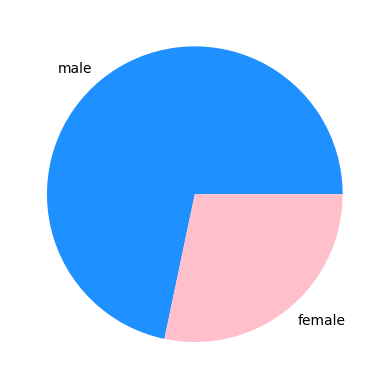

In [517]:
gender_counts = users['gender'].value_counts()
labels=['male','female']
clrs = ['dodgerblue', 'pink']

pie = plt.pie(gender_counts.values,labels=labels,colors=clrs)

plt.show()

## This chart shows the inner distribution of how many users in a particular age range are males and females. The lighter bars represent male and darker are for females

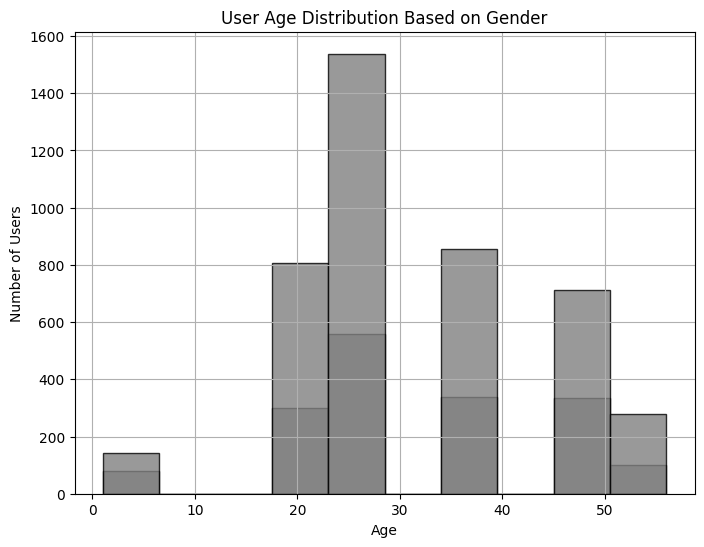

In [518]:
plt.figure(figsize=(8,6))
colors = ['gray']
users.groupby('gender').age.hist(
         histtype='bar',
         stacked=False,  
         fill=True,
         alpha=0.8,
         color=colors,
         edgecolor = "k")
plt.title('User Age Distribution Based on Gender')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

## To make more interpretations on the upper chart this plot shows more clearly the specific age and number of users in that age along with a M/F tag to determine the ages most active with reviewing movies

<AxesSubplot: title={'center': 'User ratings based on most active age in genders'}, xlabel='gender,age'>

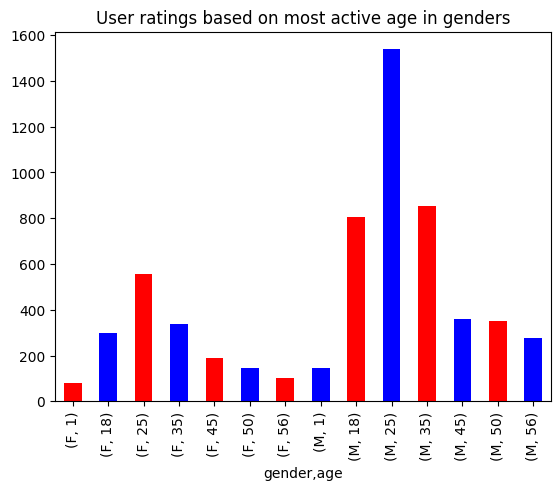

In [519]:
df_plot = users.groupby(["gender", "age"]).age.count()
df_plot.plot(kind='bar', color=[ 'r', 'b'],title="User ratings based on most active age in genders")